<a href="https://colab.research.google.com/github/ernestoespo33/tirocinio/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import scipy.stats as stats

In [ ]:
#apertura file e stampa del nome delle colonne
df = pd.read_excel('C:/Users/Ernesto Esposito/Desktop/Università/TIROCINIO/analisi_dati/dataset.xlsx')
print("Intestazione Colonne:", df.columns)

Intestazione Colonne: Index(['scc', 'conducibilità relativa 1-03-2021',
       'conducibilità media 1-03-2021', 'n°aziendali', 'MediaValMax',
       'MediaValMed', 'MediaValMin', 'MaxValMax', 'MaxValMed', 'MaxValMin',
       'MinValMax', 'MinValMed', 'MinValMin'],
      dtype='object')


In [ ]:
#stampa della colonna MediaValMed
print(df['MediaValMed'])

0     28.475000
1     30.800000
2     25.375000
3     27.950000
4     28.750000
5     30.200000
6     27.250000
7     28.216667
8     25.500000
9     27.750000
10    28.000000
11    22.575000
12    27.900000
13    27.125000
14    23.966667
15    31.825000
16    28.975000
17    29.300000
18    28.700000
Name: MediaValMed, dtype: float64


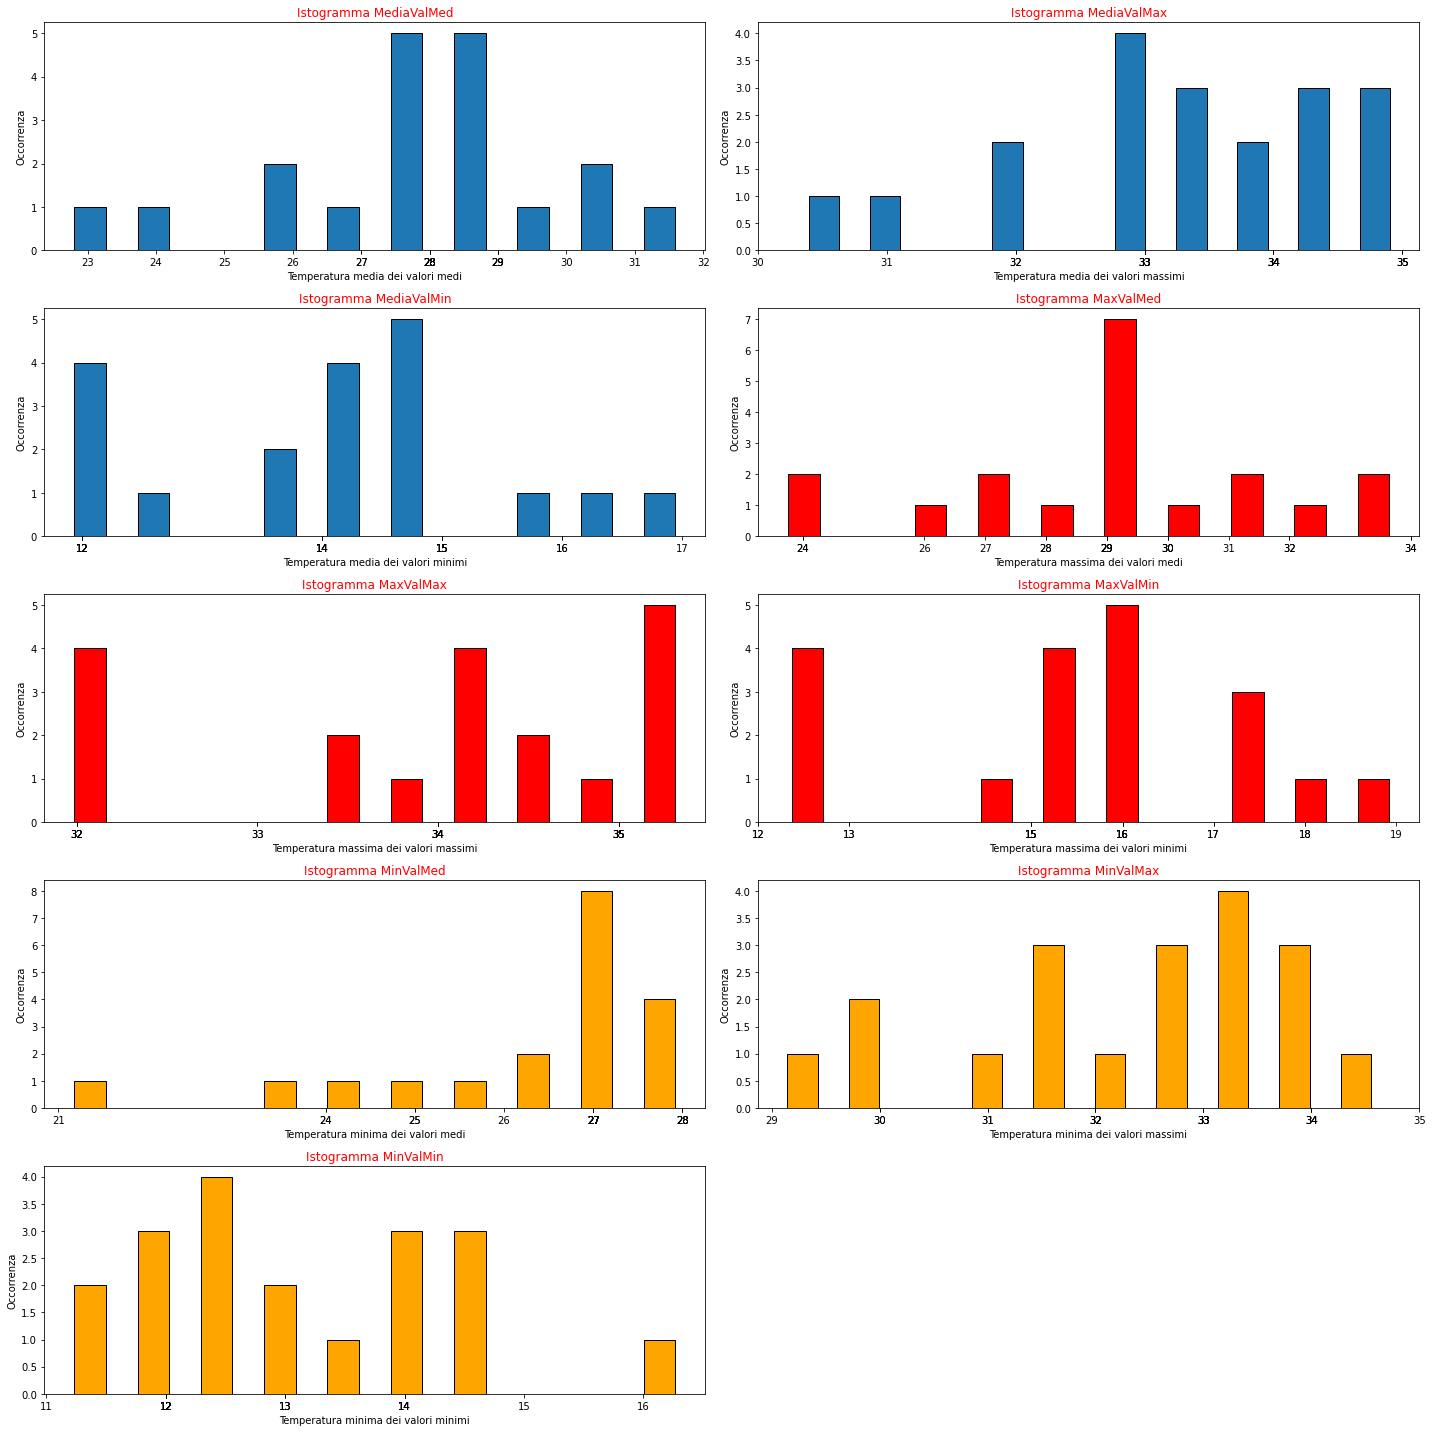

In [ ]:
#istogramma dei valori della temperatura - sull'ascissa il range di valori temperatura e sull'ordinata il numero di occorrenza
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(521)
plt.hist(df['MediaValMed'],ec='k',rwidth=0.5)
plt.xticks(round(df['MediaValMed'],0))
ax.set_title('Istogramma MediaValMed',color='red')
ax.set_xlabel('Temperatura media dei valori medi')
ax.set_ylabel('Occorrenza')

ax = fig.add_subplot(522)
plt.hist(df['MediaValMax'],ec='k',rwidth=0.5)
plt.xticks(round(df['MediaValMax'],0))
ax.set_title('Istogramma MediaValMax',color='red')
ax.set_xlabel('Temperatura media dei valori massimi')
ax.set_ylabel('Occorrenza')

ax = fig.add_subplot(523)
plt.hist(df['MediaValMin'],ec='k',rwidth=0.5)
plt.xticks(round(df['MediaValMin'],0))
ax.set_title('Istogramma MediaValMin',color='red')
ax.set_xlabel('Temperatura media dei valori minimi')
ax.set_ylabel('Occorrenza')

ax = fig.add_subplot(524)
plt.hist(df['MaxValMed'],ec='k',rwidth=0.5, color = 'red')
plt.xticks(round(df['MaxValMed'],0))
ax.set_title('Istogramma MaxValMed',color='red')
ax.set_xlabel('Temperatura massima dei valori medi')
ax.set_ylabel('Occorrenza')

ax = fig.add_subplot(525)
plt.hist(df['MaxValMax'],ec='k',rwidth=0.5, color = 'red')
plt.xticks(round(df['MaxValMax'],0))
ax.set_title('Istogramma MaxValMax',color='red')
ax.set_xlabel('Temperatura massima dei valori massimi')
ax.set_ylabel('Occorrenza')

ax = fig.add_subplot(526)
plt.hist(df['MaxValMin'],ec='k',rwidth=0.5, color = 'red')
plt.xticks(round(df['MaxValMin'],0))
ax.set_title('Istogramma MaxValMin',color='red')
ax.set_xlabel('Temperatura massima dei valori minimi')
ax.set_ylabel('Occorrenza')

ax = fig.add_subplot(527)
plt.hist(df['MinValMed'],ec='k',rwidth=0.5, color = 'orange')
plt.xticks(round(df['MinValMed'],0))
ax.set_title('Istogramma MinValMed',color='red')
ax.set_xlabel('Temperatura minima dei valori medi')
ax.set_ylabel('Occorrenza')

ax = fig.add_subplot(528)
plt.hist(df['MinValMax'],ec='k',rwidth=0.5, color = 'orange')
plt.xticks(round(df['MinValMax'],0))
ax.set_title('Istogramma MinValMax',color='red')
ax.set_xlabel('Temperatura minima dei valori massimi')
ax.set_ylabel('Occorrenza')
                 
ax = fig.add_subplot(529)
plt.hist(df['MinValMin'],ec='k',rwidth=0.5, color = 'orange')
plt.xticks(round(df['MinValMin'],0))
ax.set_title('Istogramma MinValMin',color='red')
ax.set_xlabel('Temperatura minima dei valori minimi')
ax.set_ylabel('Occorrenza')

plt.tight_layout()
plt.show()

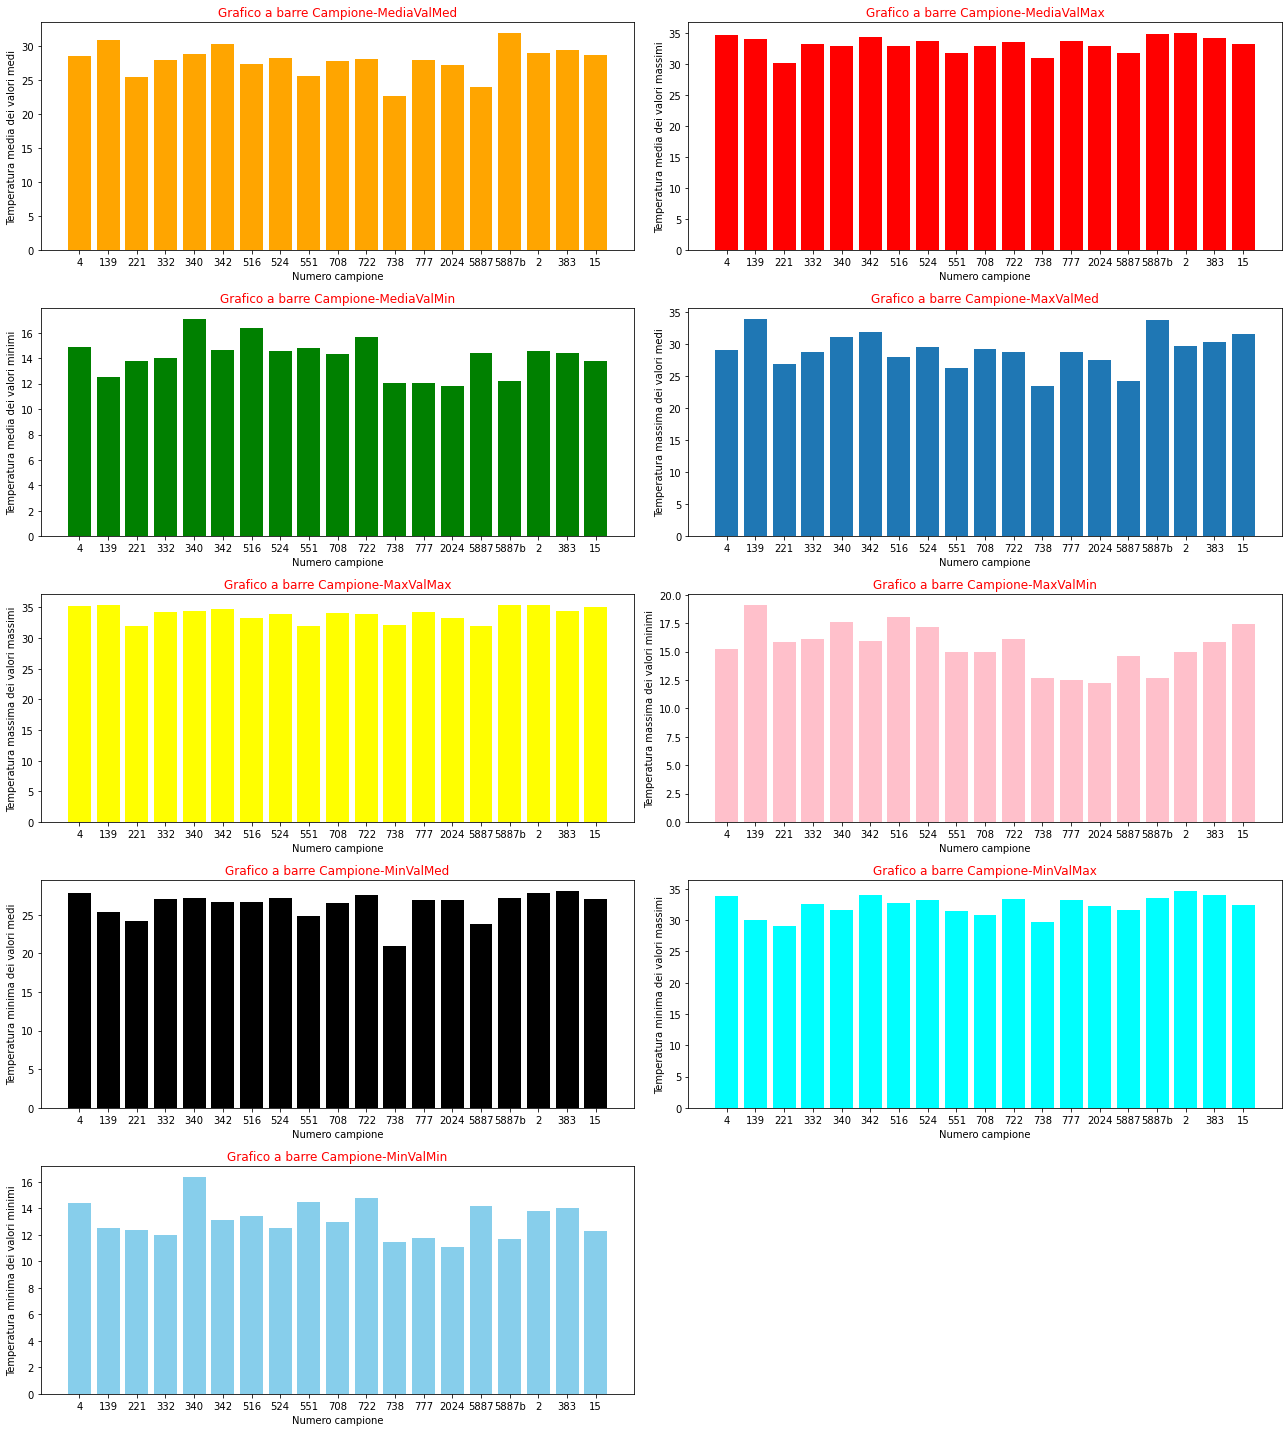

In [ ]:
#relazione tra il campione preso in esame ed il valore della temperatura - sull'ascissa ci sono i codici delle bufale e 
#ogni barra rappresenta il valore della temperatura (più alta è la barra più la  temperatura è alta)
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(521)
plt.bar(np.arange(len(df['n°aziendali'])), df['MediaValMed'],color='orange')
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MediaValMed', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura media dei valori medi')

ax = fig.add_subplot(522)
plt.bar(np.arange(len(df['n°aziendali'])), df['MediaValMax'],color='red')
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MediaValMax', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura media dei valori massimi')

ax = fig.add_subplot(523)
plt.bar(np.arange(len(df['n°aziendali'])), df['MediaValMin'],
color='green')
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MediaValMin', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura media dei valori minimi')

ax = fig.add_subplot(524)
plt.bar(np.arange(len(df['n°aziendali'])), df['MaxValMed'])
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MaxValMed', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura massima dei valori medi')

ax = fig.add_subplot(525)
plt.bar(np.arange(len(df['n°aziendali'])), df['MaxValMax'],color='yellow')
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MaxValMax', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura massima dei valori massimi')

ax = fig.add_subplot(526)
plt.bar(np.arange(len(df['n°aziendali'])), df['MaxValMin'],color='pink')
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MaxValMin', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura massima dei valori minimi')

ax = fig.add_subplot(527)
plt.bar(np.arange(len(df['n°aziendali'])), df['MinValMed'],color='black')
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MinValMed', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura minima dei valori medi')

ax = fig.add_subplot(528)
plt.bar(np.arange(len(df['n°aziendali'])), df['MinValMax'],color='cyan')
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MinValMax', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura minima dei valori massimi')

ax = fig.add_subplot(529)
plt.bar(np.arange(len(df['n°aziendali'])), df['MinValMin'],color='skyblue')
plt.xticks(np.arange(len(df['n°aziendali'])), df['n°aziendali'])
ax.set_title('Grafico a barre Campione-MinValMin', color='red')
ax.set_xlabel('Numero campione')
ax.set_ylabel('Temperatura minima dei valori minimi')

plt.tight_layout()
plt.show()


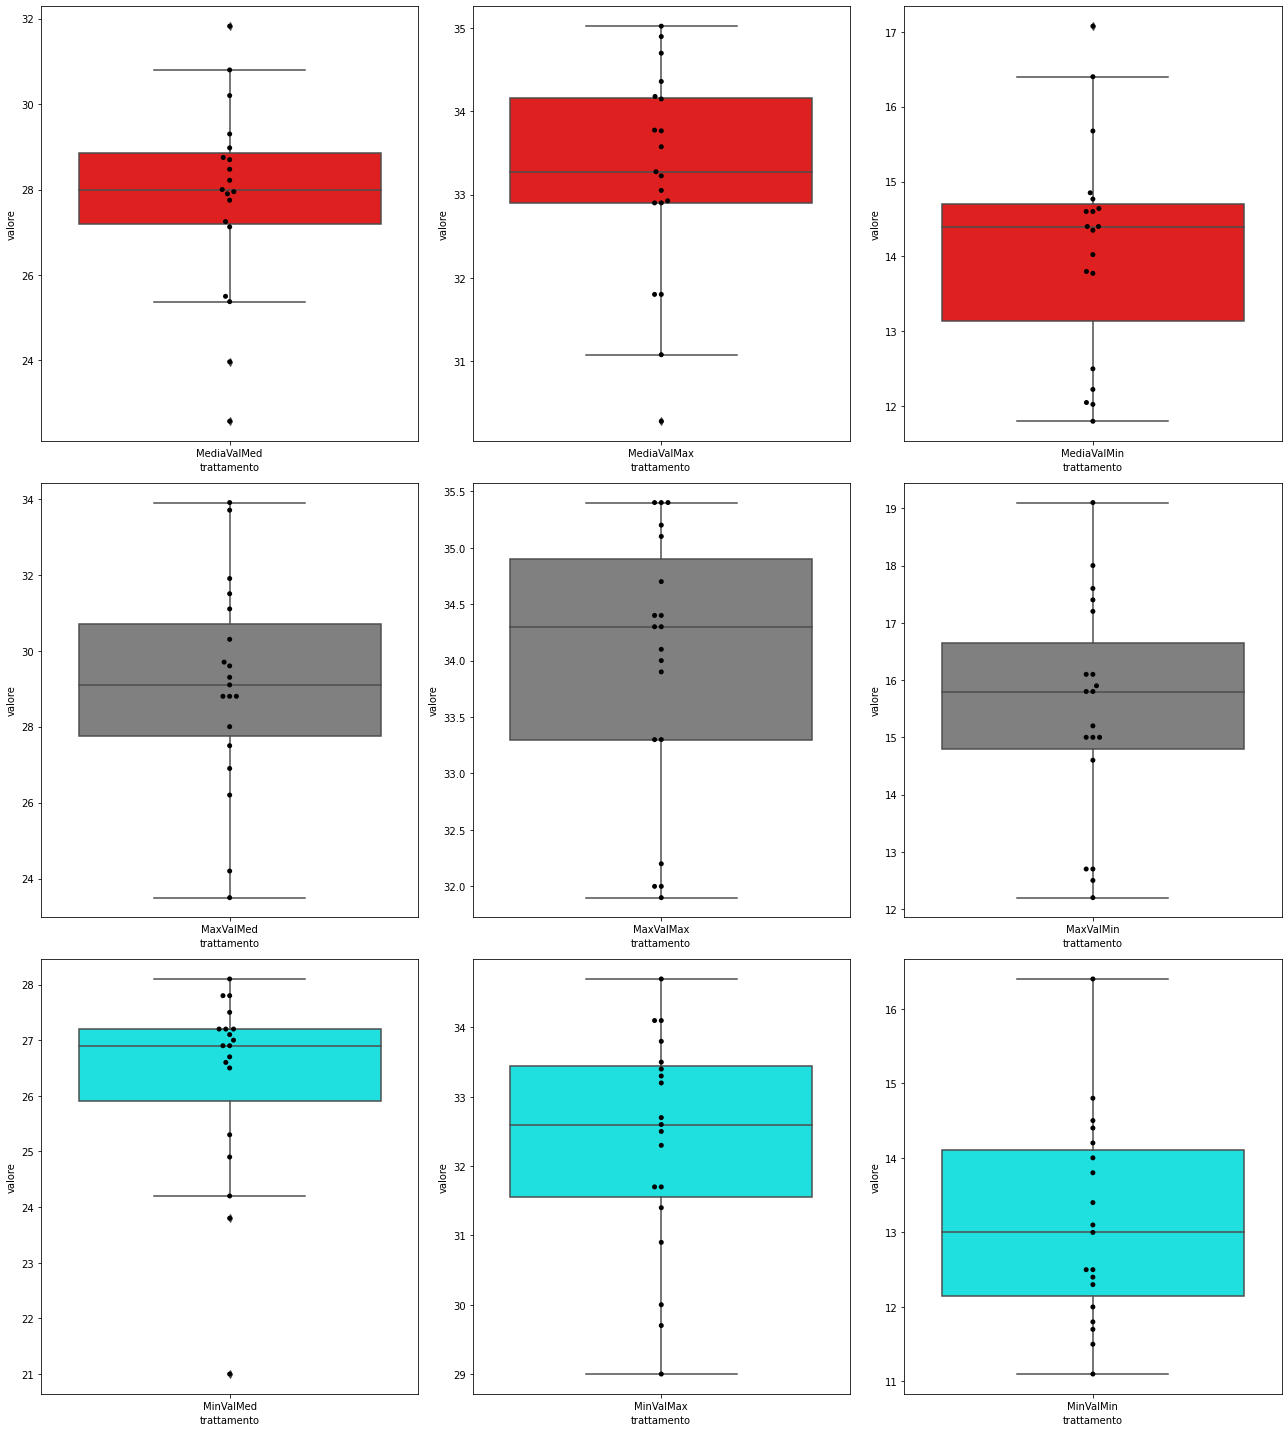

In [ ]:
#ogni box contiene 19 punti riguardanti i valori della colonna temperatura presa in esame
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(331)
df_melt = pd.melt( df, id_vars=['n°aziendali'],
value_vars=['MediaValMed'])
df_melt.columns = ['n°aziendali', 'trattamento',
'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='red')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

ax = fig.add_subplot(332)
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MediaValMax'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='red')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

ax = fig.add_subplot(333)
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MediaValMin'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='red')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

ax = fig.add_subplot(334)
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MaxValMed'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='gray')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

ax = fig.add_subplot(335)
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MaxValMax'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='gray')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

ax = fig.add_subplot(336)
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MaxValMin'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='gray')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

ax = fig.add_subplot(337)
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MinValMed'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='cyan')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

ax = fig.add_subplot(338)
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MinValMax'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='cyan')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

ax = fig.add_subplot(339)
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MinValMin'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='cyan')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

plt.tight_layout()
plt.show()

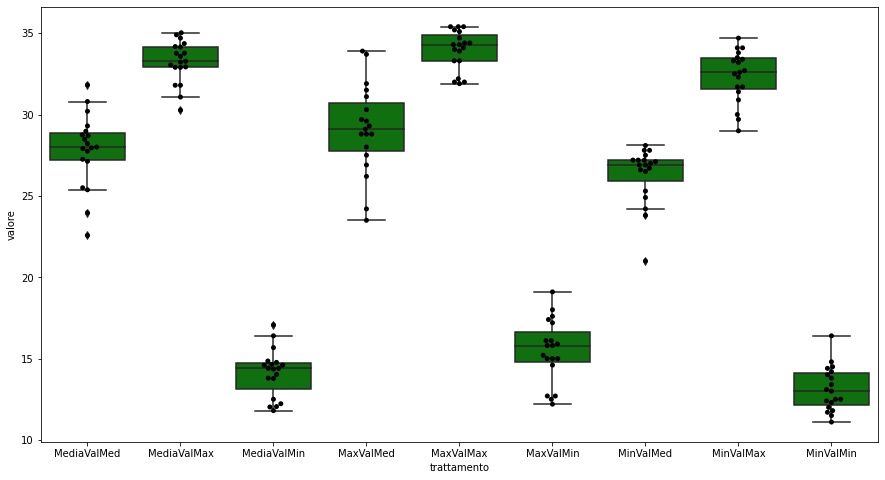

In [ ]:
#stesso discorso precedente, ma ora sullo stesso grafico si hanno i 19 box delle colonne temperatura
plt.figure(figsize=(15,8))
df_melt = pd.melt( df, id_vars=['n°aziendali'], value_vars=['MediaValMed', 'MediaValMax','MediaValMin','MaxValMed','MaxValMax','MaxValMin','MinValMed','MinValMax','MinValMin'])
df_melt.columns = ['n°aziendali', 'trattamento', 'valore']
sns.boxplot(x='trattamento', y='valore', data=df_melt, color='green')
sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')

plt.show()

In [ ]:
#variabili statistiche delle colonne temperatura
print("Caratteristiche MediaValMed")
print("Varianza:",np.var(df['MediaValMed']), "|","Minimo e Massimo:", min(df['MediaValMed']),max(df['MediaValMed']))
print("Caratteristiche MediaValMax")
print("Varianza:",np.var(df['MediaValMax']), "|","Minimo e Massimo:", min(df['MediaValMax']),max(df['MediaValMax']))
print("Caratteristiche MediaValMin")
print("Varianza:",np.var(df['MediaValMin']), "|","Minimo e Massimo:", min(df['MediaValMin']),max(df['MediaValMin']))
print("Caratteristiche MaxValMed")
print("Varianza:",np.var(df['MaxValMed']), "|","Minimo e Massimo:", min(df['MaxValMed']),max(df['MaxValMed']))
print("Caratteristiche MaxValMax")
print("Varianza:",np.var(df['MaxValMax']), "|","Minimo e Massimo:", min(df['MaxValMax']),max(df['MaxValMax']))
print("Caratteristiche MaxValMin")
print("Varianza:",np.var(df['MaxValMin']), "|","Minimo e Massimo:", min(df['MaxValMin']),max(df['MaxValMin']))
print("Caratteristiche MinValMed")
print("Varianza:",np.var(df['MinValMed']), "|","Minimo e Massimo:", min(df['MinValMed']),max(df['MinValMed']))
print("Caratteristiche MinValMax")
print("Varianza:",np.var(df['MinValMax']), "|","Minimo e Massimo:", min(df['MinValMax']),max(df['MinValMax']))
print("Caratteristiche MinValMin")
print("Varianza:",np.var(df['MinValMin']), "|","Minimo e Massimo:", min(df['MinValMin']),max(df['MinValMin']))

Caratteristiche MediaValMed
Varianza: 4.785364342874732 | Minimo e Massimo: 22.575 31.825000000000003
Caratteristiche MediaValMax
Varianza: 1.5636045244690677 | Minimo e Massimo: 30.275 35.025
Caratteristiche MediaValMin
Varianza: 2.0387960757156045 | Minimo e Massimo: 11.799999999999999 17.075
Caratteristiche MaxValMed
Varianza: 7.186814404432134 | Minimo e Massimo: 23.5 33.9
Caratteristiche MaxValMax
Varianza: 1.3760110803324102 | Minimo e Massimo: 31.9 35.4
Caratteristiche MaxValMin
Varianza: 3.5990027700831035 | Minimo e Massimo: 12.2 19.1
Caratteristiche MinValMed
Varianza: 2.918947368421053 | Minimo e Massimo: 21.0 28.1
Caratteristiche MinValMax
Varianza: 2.4014404432132976 | Minimo e Massimo: 29.0 34.7
Caratteristiche MinValMin
Varianza: 1.7524653739612186 | Minimo e Massimo: 11.1 16.4


In [ ]:
#nuovo dataset, per ogni colonna sono presenti 4 valori medi di temperatura (uno per ogni foto)
df1 = pd.read_excel('C:/Users/Ernesto Esposito/Desktop/Università/TIROCINIO/analisi_dati/esper.xlsx')
df1['num4']

0    29.1
1    28.7
2    27.8
3    28.3
Name: num4, dtype: float64

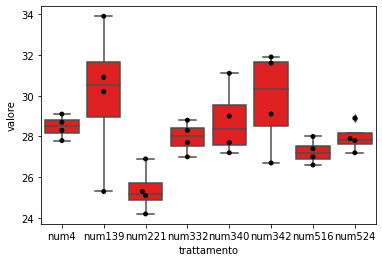

In [ ]:
#box per ogni campione
df_melt = pd.melt( df1.reset_index(), id_vars=['index'], value_vars=['num4','num139','num221','num332','num340','num342','num516','num524'])
df_melt.columns = ['indice', 'trattamento', 'valore']
ax = sns.boxplot(x='trattamento', y='valore', data=df_melt, color='red')
ax = sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')
plt.show()

In [ ]:
df2 = pd.read_excel('C:/Users/Ernesto Esposito/Desktop/Università/TIROCINIO/analisi_dati/dataset3.xlsx')

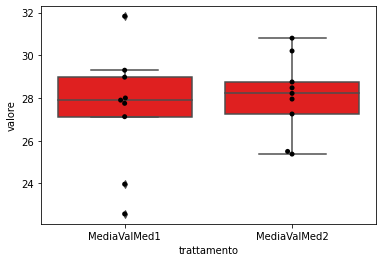

In [ ]:
#analisi ANOVA tra due medie di due popolazioni
df_melt = pd.melt( df2.reset_index(), id_vars=['index'], value_vars=['MediaValMed1','MediaValMed2'])
df_melt.columns = ['indice', 'trattamento', 'valore']
ax = sns.boxplot(x='trattamento', y='valore', data=df_melt, color='red')
ax = sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')
plt.show()

In [ ]:
#valore di F-statistico e p-value
fvalue, pvalue = stats.f_oneway(df2['MediaValMed1'],df2['MediaValMed2'])
print(fvalue, pvalue)

0.2607576434525053 0.6165730783927768


In [ ]:
model = ols('valore ~ C(trattamento)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(trattamento),1.445000,1.0,0.260758,0.616573
Residual,88.664707,16.0,NaN,NaN


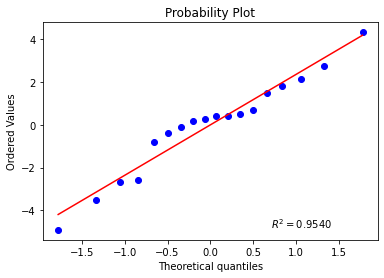

In [ ]:
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)

plt.show()

In [ ]:
#shapiro-wilk
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9610861539840698 0.6227356195449829


In [ ]:
#test barlett
w, pvalue = stats.bartlett(df2['MediaValMed1'], df2['MediaValMed2'])
print(w, pvalue)

1.2192616420669036 0.26950560373193183


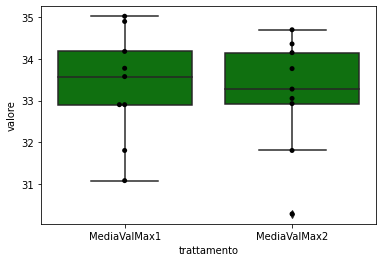

In [ ]:
df_melt = pd.melt( df2.reset_index(), id_vars=['index'], value_vars=['MediaValMax1','MediaValMax2'])
df_melt.columns = ['indice', 'trattamento', 'valore']
ax = sns.boxplot(x='trattamento', y='valore', data=df_melt, color='green')
ax = sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')
plt.show()

In [ ]:
fvalue, pvalue = stats.f_oneway(df2['MediaValMax1'],df2['MediaValMax2'])
print(fvalue, pvalue)

0.10064850430846235 0.7551551178686224


In [ ]:
model = ols('valore ~ C(trattamento)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(trattamento),0.185711,1.0,0.100649,0.755155
Residual,29.522349,16.0,NaN,NaN


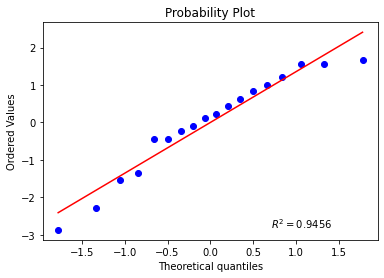

In [ ]:
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)

plt.show()

In [ ]:
#shapiro-wilk
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9366321563720703 0.25356194376945496


In [ ]:
#test barlett
w, pvalue = stats.bartlett(df2['MediaValMax1'], df2['MediaValMax2'])
print(w, pvalue)

0.01460578715077411 0.9038063570974898


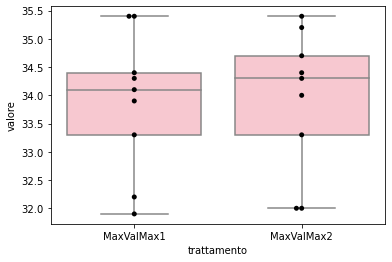

In [ ]:
df_melt = pd.melt( df2.reset_index(), id_vars=['index'], value_vars=['MaxValMax1','MaxValMax2'])
df_melt.columns = ['indice', 'trattamento', 'valore']
ax = sns.boxplot(x='trattamento', y='valore', data=df_melt, color='pink')
ax = sns.swarmplot(x="trattamento", y="valore", data=df_melt, color='black')
plt.show()

In [ ]:
fvalue, pvalue = stats.f_oneway(df2['MaxValMax1'],df2['MaxValMax2'])
print(fvalue, pvalue)

0.0057414551000270755 0.9405395396974767


In [ ]:
model = ols('valore ~ C(trattamento)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(trattamento),0.008889,1.0,0.005741,0.94054
Residual,24.771111,16.0,NaN,NaN


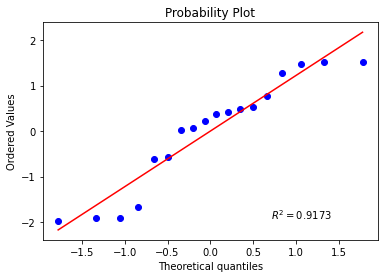

In [ ]:
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)

plt.show()

In [ ]:
#shapiro-wilk
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8949031829833984 0.04687041416764259


In [ ]:
#test barlett
w, pvalue = stats.bartlett(df2['MaxValMax1'], df2['MaxValMax2'])
print(w, pvalue)

0.0017721006013080316 0.966421909585005


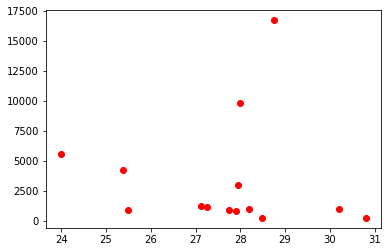

In [ ]:
#ogni punto ha una coordinata (MediaValMed[i],scc[i])
cell_som = df['scc']
cell_som = cell_som[np.logical_not(np.isnan(cell_som))]
med_val_med = [28.475,30.8,25.375,27.95,28.75,30.2,27.25,28.2,25.5,27.75,28,27.9,27.125,24]
plt.plot(med_val_med,cell_som, color="red", marker="o", linestyle="")
plt.show()